In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df=sns.load_dataset("titanic")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [63]:
missing_age_rows=df[df['deck'].isnull()]
display(missing_age_rows)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [73]:
df['age'].fillna(df['age'].median(),)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [75]:
display(df[df['age'].isnull()])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [77]:
df['embarked'].fillna(df['embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [13]:
missing_deck_ratio=df['deck'].isnull().sum()/len(df)
print(missing_deck_ratio)
if missing_deck_ratio>0.5:
    df.drop(columns=['deck'],inplace=True)

    print("'deck' column dropped due to excessive missing values(>50%).")
else:
    df['deck'].fillna('Unknown',inplace=True)
    # otherwise, fill missing values with 'Unknown'

0.7721661054994389
'deck' column dropped due to excessive missing values(>50%).


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [15]:
# Handling Categorical Variables
df['sex']=df['sex'].map({'male' : 0,'female': 1})
print(df.head())
df.info()

   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500        S  Third    man   
1         1       1    1  38.0      1      0  71.2833        C  First  woman   
2         1       3    1  26.0      0      0   7.9250        S  Third  woman   
3         1       1    1  35.0      1      0  53.1000        S  First  woman   
4         0       3    0  35.0      0      0   8.0500        S  Third    man   

   adult_male  embark_town alive  alone  
0        True  Southampton    no  False  
1       False    Cherbourg   yes  False  
2       False  Southampton   yes   True  
3       False  Southampton   yes  False  
4        True  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null   

## One Hot Coding

In [17]:
df=pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,False,True
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,False,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,False,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,False,True
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,False,True


In [19]:
#Convert Pclass to categorical
df['pclass']=df['pclass'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    category
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
 13  embarked_Q   891 non-null    bool    
 14  embarked_S   891 non-null    bool    
dtypes: bool(4), category(2), float64(2), int64(4), object(3)
memory usage: 68.3+ KB


## Univariate Analysis (Single Feature Analysis)

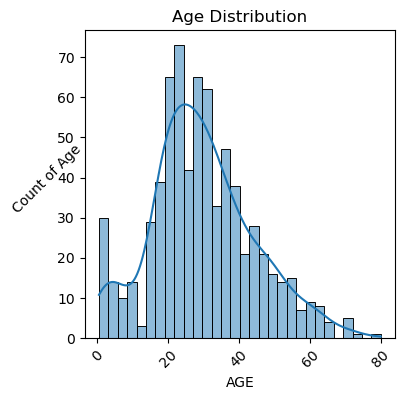

In [22]:
plt.figure(figsize=(4,4))
sns.histplot(df['age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.xlabel('AGE')
plt.ylabel('Count of Age', rotation=45)
plt.show()

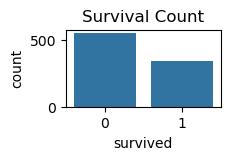

In [23]:
plt.figure(figsize=(2,1))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

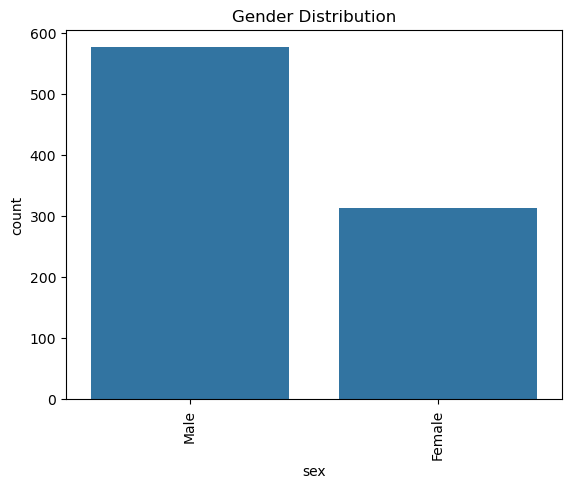

In [24]:
data=df.copy()
sns.countplot(x='sex',data=data)
plt.title('Gender Distribution')
plt.xticks([0,1],['Male','Female'], rotation=90)
plt.show()

## Bivariate Analysis(Feature Vs Survival)

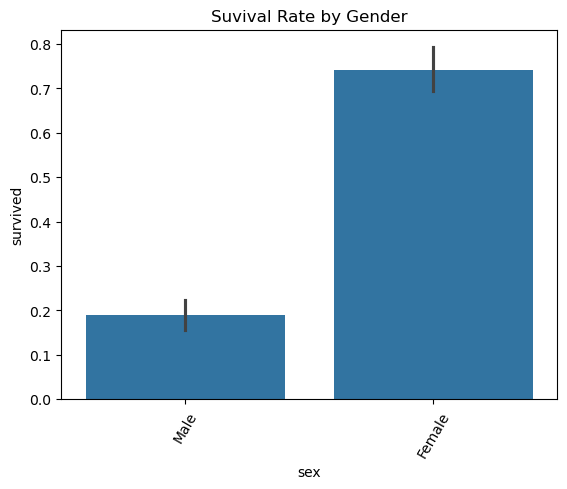

In [26]:
sns.barplot(x='sex',y='survived',data=df)
plt.title('Suvival Rate by Gender')
plt.xticks([0,1],['Male','Female'], rotation=60)
plt.show()

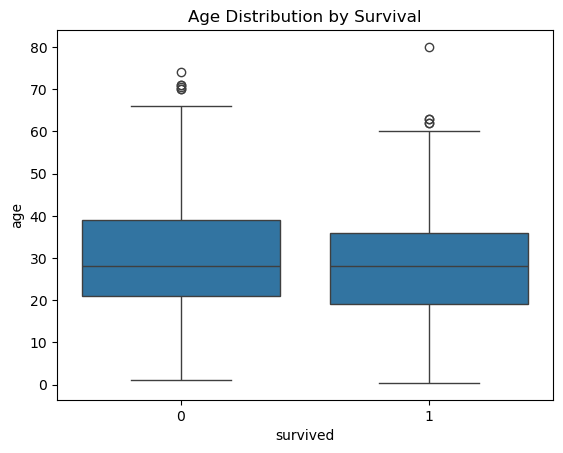

In [27]:
sns.boxplot(x='survived',y='age',data=df)
plt.title('Age Distribution by Survival')
plt.show()

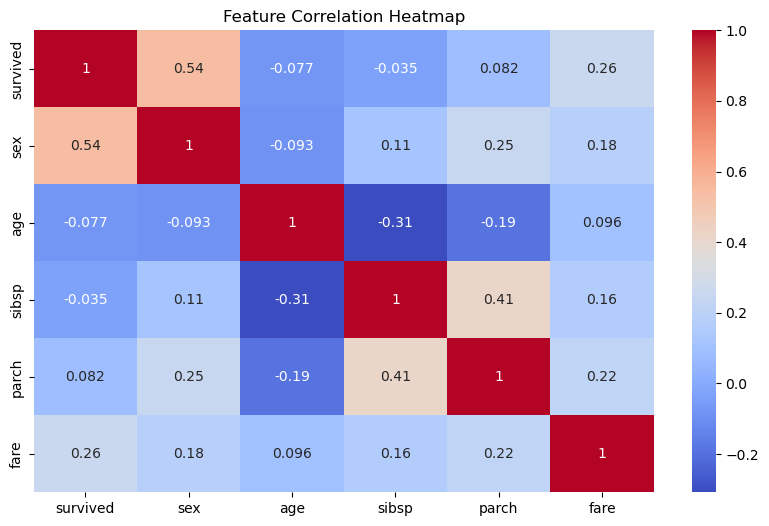

In [28]:
numeric_df=df.select_dtypes(include=['number'])

corr_matrix=numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()